# Работа с SQL базой в Python

База данных sakila - учебна база от разработчиков mysql. Она описывает работу вымышленного магазина проката DVD-дисков. Структура базы описана в файле `sakila-en.a4.pdf`.

Подключение к базе выполняется следующим образом.

In [2]:
import mysql.connector

user='admin'
password='admin'
host='mysql'
port=3306
database='sakila'

try:
    cnx = mysql.connector.connect(
        user=user, password=password,
        host=host, port=port, database=database)
    print(f"""Подключение установлено:
хост: {cnx.server_host}
порт: {cnx.server_port}
пользователь: {cnx.user}""")
    cursor = cnx.cursor()   
except mysql.connector.Error as e:
    print(f"Ошибка подключения к серверу:\n{e}")

 

Подключение установлено:
хост: mysql
порт: 3306
пользователь: admin


## Задание 1
Используя таблицы `rental` и `customer`, напишите запрос, который будет подсчитывать, сколько заказов сделал каждый из клиентов.

Пример выполнения задания:

In [3]:
qu = """
select c.first_name, c.last_name, count(*) as cnt from rental r
join customer c  on r.customer_id = c.customer_id
group by c.customer_id
order by cnt desc
limit 10
"""

После выполнения этого запроса объект `cursor` предоставляет генератор, по которому можно итерировать в цикле `for`. Так как этоо генератор, то итерировать можно только один раз. Чтобы выполнить итерации повторно, нужно снова выполнить запрос.

In [4]:
cursor.execute(qu)
for rec in cursor:
    print(f"{rec}")

('ELEANOR', 'HUNT', 46)
('KARL', 'SEAL', 45)
('CLARA', 'SHAW', 42)
('MARCIA', 'DEAN', 42)
('TAMMY', 'SANDERS', 41)
('SUE', 'PETERS', 40)
('WESLEY', 'BULL', 40)
('MARION', 'SNYDER', 39)
('RHONDA', 'KENNEDY', 39)
('TIM', 'CARY', 39)


При помощи метода `.fetchall` можно получить результаты запроса в виде списка. 

In [5]:
cursor.execute(qu)
data = cursor.fetchall()
print(data)

[('ELEANOR', 'HUNT', 46), ('KARL', 'SEAL', 45), ('CLARA', 'SHAW', 42), ('MARCIA', 'DEAN', 42), ('TAMMY', 'SANDERS', 41), ('SUE', 'PETERS', 40), ('WESLEY', 'BULL', 40), ('MARION', 'SNYDER', 39), ('RHONDA', 'KENNEDY', 39), ('TIM', 'CARY', 39)]


Выполнить запрос, привести имена и фамилии к нижнему регистру кроме перовой буквы, собрать их вместе и построить столбцовую диаграмму заказов первых 10 самых "преданных" клиентов.

In [6]:
cursor.execute(qu)
names = []
cnts = []
for first_name, last_name, cnt in cursor:
    names.append(f"{first_name[0] + first_name[1:].lower()} {last_name[0] + last_name[1:].lower()}")
    cnts.append(cnt)

print(names)
print(cnts)

['Eleanor Hunt', 'Karl Seal', 'Clara Shaw', 'Marcia Dean', 'Tammy Sanders', 'Sue Peters', 'Wesley Bull', 'Marion Snyder', 'Rhonda Kennedy', 'Tim Cary']
[46, 45, 42, 42, 41, 40, 40, 39, 39, 39]


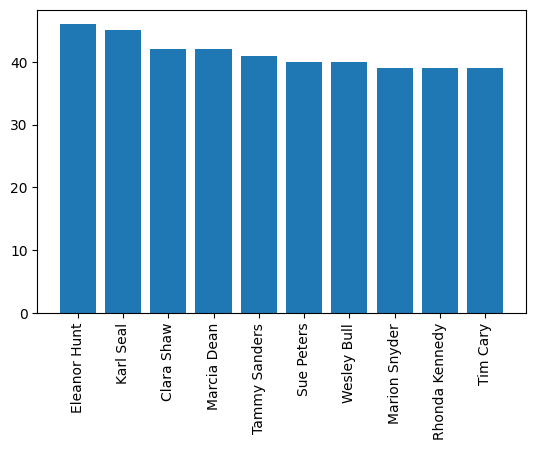

In [7]:
import matplotlib.pyplot as plt
cm = 1.0 / 2.54

fig, ax = plt.subplots(figsize=(16*cm, 10*cm))
ax.bar(names, cnts)
ax.tick_params(axis='x', labelrotation=90)

## Задание 2

Постройте запрос, возвращающий количество фильмов, в которых снимался каждый актёр из числа тех, что внесены в базу. Для десяти наиболее популярных актёров постройте столбчатую диаграмму с горизонтальными столбцам: по оси абсцисс отложите имена и фамилии актёров, по оси ординат - число фильмов.

In [13]:
# Ваш код: 
query = """select a.actor_id, a.first_name, a.last_name, count(f.film_id) as film_count
from film f
join film_actor fa on fa.film_id = f.film_id
join actor a on a.actor_id = fa.actor_id
group by a.actor_id
order by film_count desc
limit 10
"""


In [14]:
cursor.execute(query)
data = cursor.fetchall()
print(data)

[(107, 'GINA', 'DEGENERES', 42), (102, 'WALTER', 'TORN', 41), (198, 'MARY', 'KEITEL', 40), (181, 'MATTHEW', 'CARREY', 39), (23, 'SANDRA', 'KILMER', 37), (81, 'SCARLETT', 'DAMON', 36), (144, 'ANGELA', 'WITHERSPOON', 35), (13, 'UMA', 'WOOD', 35), (158, 'VIVIEN', 'BASINGER', 35), (106, 'GROUCHO', 'DUNST', 35)]


In [16]:
names = []
counts = []
for el in data:
    names.append(el[1] + ' ' + el[2])
    counts.append(el[3])

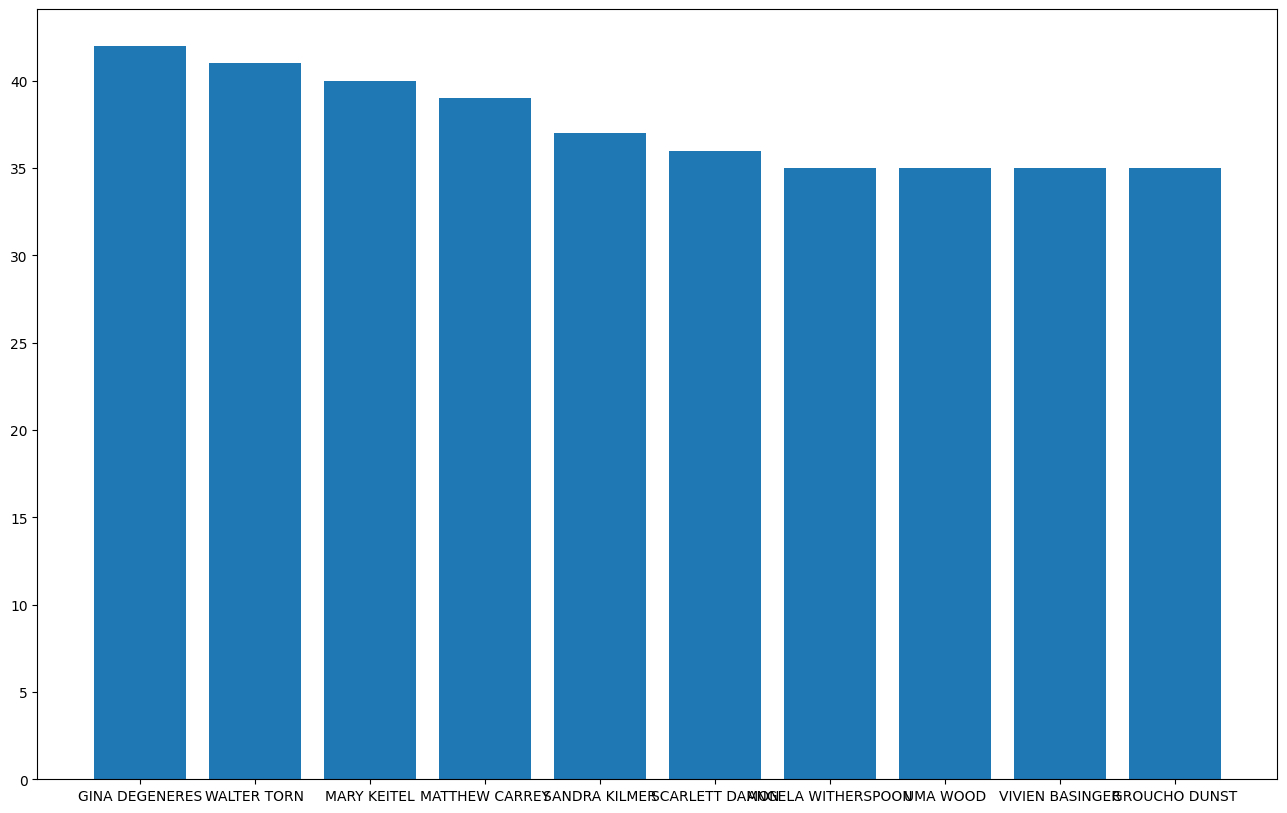

In [17]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(names, counts)
ax.tick_params(axis='x')

## Задание 3

Постройте запрос, который подсчитывает количество копий (дисков) каждого из фильмов. Используя Python, получите список фильмов для которых имеется больше всего копий.

In [19]:
# Ваш код:
query = """select f.film_id, f.title, count(i.inventory_id) as copy_count
from inventory i
join film f on i.film_id = f.film_id
group by f.film_id
"""

In [28]:
cursor.execute(query)
data = cursor.fetchall()
print(data[:10])

[(1, 'ACADEMY DINOSAUR', 8), (2, 'ACE GOLDFINGER', 3), (3, 'ADAPTATION HOLES', 4), (4, 'AFFAIR PREJUDICE', 7), (5, 'AFRICAN EGG', 3), (6, 'AGENT TRUMAN', 6), (7, 'AIRPLANE SIERRA', 5), (8, 'AIRPORT POLLOCK', 4), (9, 'ALABAMA DEVIL', 5), (10, 'ALADDIN CALENDAR', 7)]


In [34]:
data_sorted = sorted(data, key = lambda x: -x[2])

In [35]:
print('\n'.join(x[1] + ' - ' + str(x[2]) for x in data_sorted[:10]))

ACADEMY DINOSAUR - 8
APACHE DIVINE - 8
BEVERLY OUTLAW - 8
BINGO TALENTED - 8
BOOGIE AMELIE - 8
BOUND CHEAPER - 8
BUCKET BROTHERHOOD - 8
BUTTERFLY CHOCOLAT - 8
CAT CONEHEADS - 8
CONFIDENTIAL INTERVIEW - 8


## Задание 4

Постройте запрос, который строит список названий фильмов, начинающихся на 'Z', и адресов по которым хранятся соответствующие диски.

In [38]:
# Ваш код:
query = """select f.title, a.address
from film f
join inventory i on f.film_id = i.film_id
join rental r on r.inventory_id = i.inventory_id
join customer c on c.customer_id = r.customer_id
join address a on a.address_id = c.address_id
where f.title like 'Z%'
"""

In [40]:
cursor.execute(query)
data = cursor.fetchall()
print('\n'.join(x[0] + ' - ' + x[1] for x in data))

ZORRO ARK - 955 Bamenda Way
ZORRO ARK - 1229 Valencia Parkway
ZOOLANDER FICTION - 687 Alessandria Parkway
ZHIVAGO CORE - 1519 Santiago de los Caballeros Loop
ZORRO ARK - 808 Bhopal Manor
ZORRO ARK - 98 Stara Zagora Boulevard
ZORRO ARK - 1837 Kaduna Parkway
ZHIVAGO CORE - 913 Coacalco de Berriozábal Loop
ZORRO ARK - 1002 Ahmadnagar Manor
ZOOLANDER FICTION - 1192 Tongliao Street
ZHIVAGO CORE - 947 Tórshavn Place
ZORRO ARK - 686 Garland Manor
ZORRO ARK - 1568 Celaya Parkway
ZOOLANDER FICTION - 786 Aurora Avenue
ZOOLANDER FICTION - 1440 Fukuyama Loop
ZHIVAGO CORE - 374 Bat Yam Boulevard
ZORRO ARK - 913 Coacalco de Berriozábal Loop
ZORRO ARK - 241 Mosul Lane
ZOOLANDER FICTION - 782 Mosul Street
ZOOLANDER FICTION - 269 Cam Ranh Parkway
ZORRO ARK - 1002 Ahmadnagar Manor
ZORRO ARK - 1668 Anápolis Street
ZOOLANDER FICTION - 1957 Yantai Lane
ZHIVAGO CORE - 486 Ondo Parkway
ZORRO ARK - 1378 Beira Loop
ZORRO ARK - 201 Effon-Alaiye Way
ZORRO ARK - 369 Papeete Way
ZOOLANDER FICTION - 415 Pune Avenue

## Задание 5

Постройте и выполните запрос, который выводит адреса хранилищ дисков и количество дисков в каждом из них.

In [45]:
# Ваш код:
query = """select a.address, count(i.inventory_id)
from store s
join address a on a.address_id = s.address_id
join inventory i on i.store_id = s.store_id
group by i.store_id
"""

In [46]:
cursor.execute(query)
data = cursor.fetchall()
print(data)

[('47 MySakila Drive', 2270), ('28 MySQL Boulevard', 2311)]


## Задание 6

Постройте и выполните запрос, который подсчитывает количество взятых в прокат дисков по месяцам. Постройте на основе его результаиа столбчатую диаграмму, в которой по оси абсцисс были бы отложены месяцы, от января до декабря включительно, а по оси ординат — количество взятых дисков. Вероятно, потребуется использовать модуль calendar.

In [47]:
# Ваш код:
query = """select count(rental_id), date_format(rental_date, '%Y-%m') as year_monthh
from rental r
group by year_monthh"""

In [48]:
cursor.execute(query)
data = cursor.fetchall()
print(data)

[(1156, '2005-05'), (2311, '2005-06'), (6709, '2005-07'), (5686, '2005-08'), (182, '2006-02')]


In [49]:
months = []
counts = []
for el in data:
    months.append(el[1])
    counts.append(el[0])

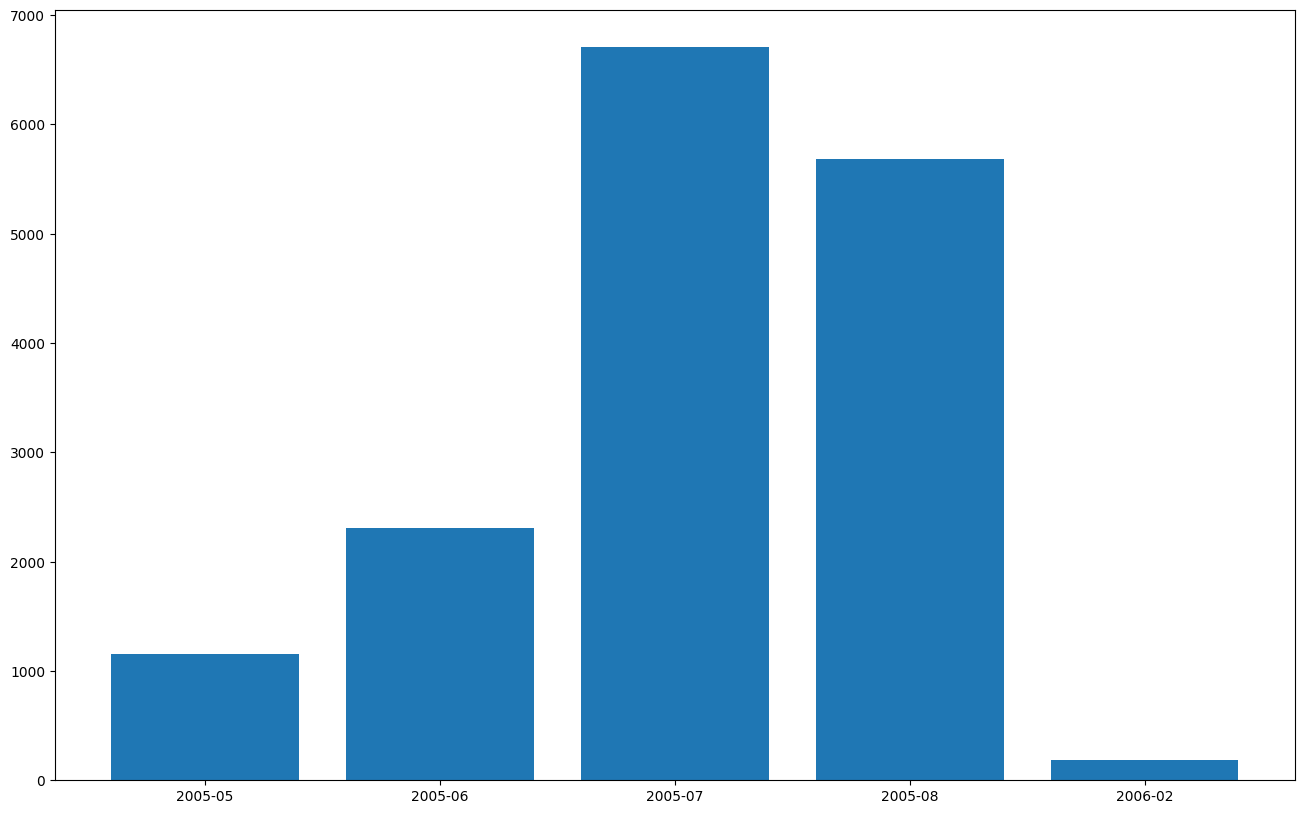

In [50]:
fig, ax = plt.subplots(figsize=(16, 10))
ax.bar(months, counts)
ax.tick_params(axis='x')